<a href="https://colab.research.google.com/github/safin92/serezha_safin/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Загрузка библиотек
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Задание параметров, выбраны регионы - Москва (113) и Челябинск (1384)
positions = ["Data Analyst", "Data Scientist", "Data Engineer"]
levels = ["Junior", "Middle", "Senior"]
region_dict = {
    "113": "Москва",
    "1384": "Челябинск"
    }

In [3]:
# Запрос данных
def get_vacancies(position, level, region):
    url = "https://api.hh.ru/vacancies"
    params = {
        "text": f"{position} {level}",
        "area": id,
        "per_page": 100,
        "page": 0
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json().get('found', 0)
    else:
        return 0

In [4]:
 # Сбор данных
data = []

for id, region_name in region_dict.items():
    for position in positions:
        for level in levels:
            vacancies_count = get_vacancies(position, level, id)
            data.append({
                "Должность": position,
                "Уровень": level,
                "Регион": region_name,
                "Количество вакансий": vacancies_count
            })

In [5]:
# Преобразование в DataFrame и вывод
df = pd.DataFrame(data)
print(df)

         Должность Уровень     Регион  Количество вакансий
0     Data Analyst  Junior     Москва                   95
1     Data Analyst  Middle     Москва                  179
2     Data Analyst  Senior     Москва                  796
3   Data Scientist  Junior     Москва                   32
4   Data Scientist  Middle     Москва                   81
5   Data Scientist  Senior     Москва                  179
6    Data Engineer  Junior     Москва                   55
7    Data Engineer  Middle     Москва                  132
8    Data Engineer  Senior     Москва                  514
9     Data Analyst  Junior  Челябинск                    0
10    Data Analyst  Middle  Челябинск                    0
11    Data Analyst  Senior  Челябинск                    3
12  Data Scientist  Junior  Челябинск                    0
13  Data Scientist  Middle  Челябинск                    0
14  Data Scientist  Senior  Челябинск                    2
15   Data Engineer  Junior  Челябинск                   

In [6]:
# Группировка данных по должности, уровню и суммирование вакансий по регионам
grouped_df = df.groupby(['Должность', 'Уровень'])['Количество вакансий'].sum().reset_index()

# Вывод группированных данных для проверки
print(grouped_df)

        Должность Уровень  Количество вакансий
0    Data Analyst  Junior                   95
1    Data Analyst  Middle                  179
2    Data Analyst  Senior                  799
3   Data Engineer  Junior                   55
4   Data Engineer  Middle                  132
5   Data Engineer  Senior                  514
6  Data Scientist  Junior                   32
7  Data Scientist  Middle                   81
8  Data Scientist  Senior                  181


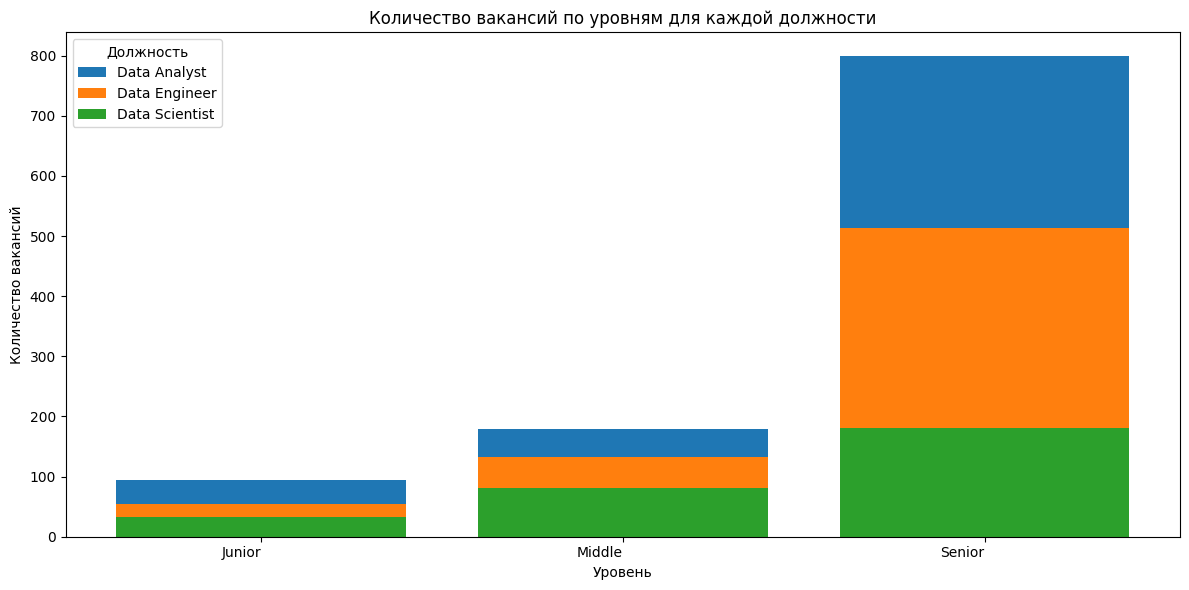

In [8]:
# Визуализация данных
plt.figure(figsize=(12, 6))

# Для каждой должности строим столбики
for position in grouped_df['Должность'].unique():
    subset = grouped_df[grouped_df['Должность'] == position]
    plt.bar(subset['Уровень'], subset['Количество вакансий'], label=position)

plt.title("Количество вакансий по уровням для каждой должности")
plt.xlabel("Уровень")
plt.ylabel("Количество вакансий")
plt.legend(title="Должность")
plt.xticks(rotation=0, ha='right', fontsize=10)
plt.tight_layout()
plt.show()
